**Цель работы** – определение количества конформеров молекулы и значений барьеров вращения.

Задачи: 
1. На выбранном уровне теории определить количество и структуру конформеров.
2. Определить переходные состояния, которым соответствуют минимальные барьеры вращения.
3. Определить состав смеси конформеров, значения барьеров вращения

Предлагаемый ход работы: 
1. Выбор оси вращения (основной, в случае, если их 2 и более);
2. Грубое сканирование по вращению по выбранной оси (37 шагов по 10 град.);
3. Оптимизация выявленных конформеров (минимумов), определение их энергии;
4. Тонкое сканирование только у максимумов (10-20 шагов по 1 град.)
5. Колебательный расчёт для подтверждения нахождения переходного состояния первого порядка (только одна мнимая частота колебаний).

https://sites.google.com/site/orcainputlibrary/geometry-optimizations

In a relaxed scan, a geometry optimisation is performed in each scan step, relaxing the geometry (all other coordinates) but keeping the constraint in place. In an unrelaxed scan, there is no optimisation performed in a scan step and hence no relaxation (much cheaper).

In [4]:
import orca_parser
import matplotlib.pyplot as plt
from orca_parser import * 
import ase, sys
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
conformer_num = [f"{i:02}" for i in range(1, 38)]
print("5-butilthiadiazole conformers")
Optimization = ORCAParse("/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab.out")
print("ORCA exited normally:", Optimization.valid)
print("Job took:", Optimization.seconds(), "seconds")

Optimization.parse_coords()
Optimization.parse_energies()
print("Energy at convergence:")
print(Optimization.energies[-1], "Ha")
print(float(Optimization.energies[-1]) / 2.294e+17, "J")
Optimization.parse_free_energy()



5-butilthiadiazole conformers
ORCA exited normally: True
Job took: 7816.72 seconds
Energy at convergence:
-739.383968142945 Ha
-3.2231210468306235e-15 J


In [5]:
conformers = {}
for i in conformer_num:
    with open(f'/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab.0{i}.xyz', 'r') as file:
        file.readline()
        second_line = file.readline()
        start_index = 43 # Начальный индекс
        end_index = 60  # Конечный индекс (не включая)

        specific_characters = second_line[start_index:end_index]

        conformers[i] = [float(specific_characters)]  
        
df = pd.DataFrame(conformers)
df.index = ['Eh']
print(df.T)

            Eh
01 -739.383968
02 -739.383917
03 -739.383747
04 -739.383528
05 -739.383355
06 -739.383316
07 -739.383444
08 -739.383714
09 -739.384054
10 -739.384379
11 -739.384621
12 -739.384741
13 -739.384716
14 -739.384533
15 -739.384192
16 -739.383715
17 -739.383176
18 -739.382711
19 -739.382491
20 -739.382616
21 -739.383029
22 -739.383569
23 -739.384078
24 -739.384464
25 -739.384689
26 -739.384749
27 -739.384654
28 -739.384429
29 -739.384113
30 -739.383771
31 -739.383486
32 -739.383329
33 -739.383332
34 -739.383477
35 -739.383693
36 -739.383883
37 -739.383968


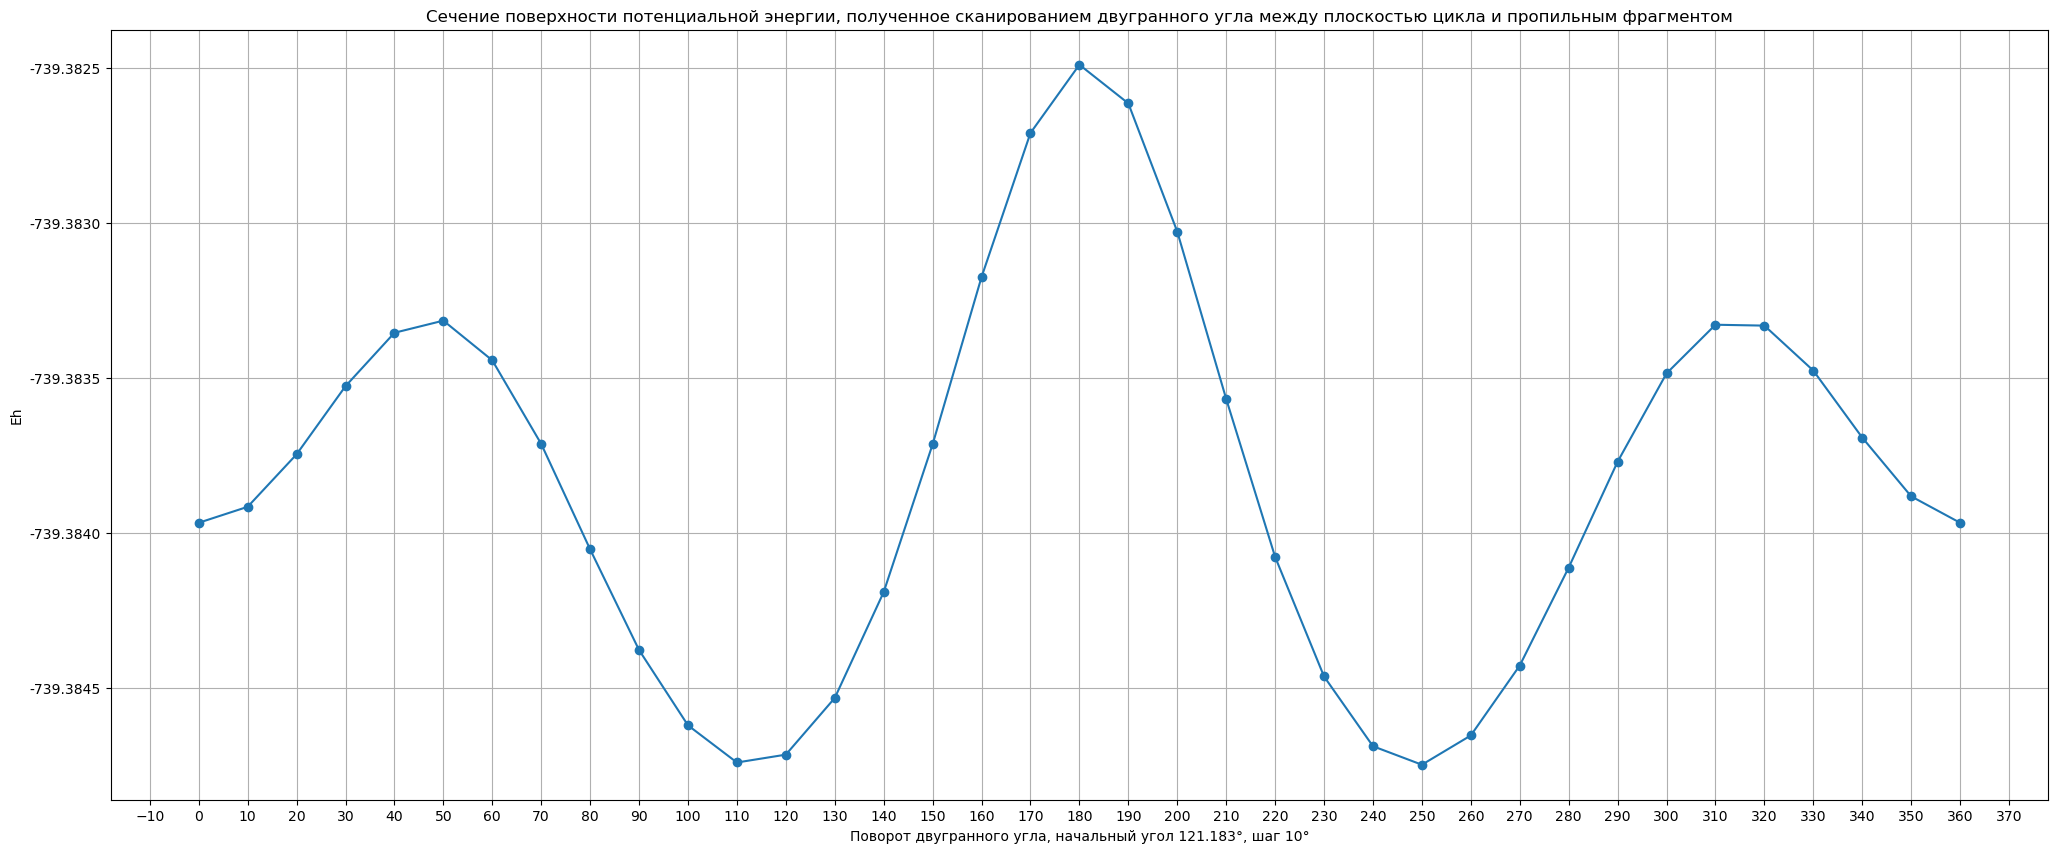

In [8]:
conf_energies = list(conformers.values())
x_ticks = [i for i in range(0,370,10)]
plt.figure(figsize=(25, 10))
plt.plot(x_ticks, conf_energies, marker='o')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.0005))
plt.title('Сечение поверхности потенциальной энергии, полученное сканированием двугранного угла между плоскостью цикла и пропильным фрагментом')
plt.ylabel('Eh')
plt.xlabel('Поворот двугранного угла, начальный угол 121.183°, шаг 10°')
plt.grid()

Барьер вращения это разница между высшей и низшей точкой энергии перехода PES  между обозначенными конформерами

In [11]:
conformer_correction01 = {}
conformer_num = [f"{i:02}" for i in range(1, 11)]
for i in conformer_num:
    with open(f'/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab_correction/01_correction/conformers_lab.001.0{i}.xyz', 'r') as file:
        file.readline()
        second_line = file.readline()
        start_index = 47 # Начальный индекс
        end_index = 60  # Конечный индекс (не включая)

        specific_characters = second_line[start_index:end_index]

        conformer_correction01[i] = [float(specific_characters)]  
        
df = pd.DataFrame(conformer_correction01)
df.index = ['Eh']
print(df.T)

            Eh
01 -739.383968
02 -739.383969
03 -739.383969
04 -739.383966
05 -739.383962
06 -739.383956
07 -739.383949
08 -739.383940
09 -739.383929
10 -739.383917


In [13]:
conformer_correction05 = {}
conformer_num = [f"{i:02}" for i in range(1, 21)]
for i in conformer_num:
    with open(f'/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab_correction/05_correction/conformers_lab.005.0{i}.xyz', 'r') as file:
        file.readline()
        second_line = file.readline()
        start_index = 47 # Начальный индекс
        end_index = 60  # Конечный индекс (не включая)

        specific_characters = second_line[start_index:end_index]

        conformer_correction05[i] = [float(specific_characters)]  
        
df = pd.DataFrame(conformer_correction05)
df.index = ['Eh']
print(df.T)

            Eh
01 -739.383356
02 -739.383344
03 -739.383334
04 -739.383326
05 -739.383319
06 -739.383315
07 -739.383312
08 -739.383311
09 -739.383312
10 -739.383314
11 -739.383319
12 -739.383325
13 -739.383334
14 -739.383344
15 -739.383356
16 -739.383370
17 -739.383386
18 -739.383404
19 -739.383423
20 -739.383444


In [15]:
conformer_correction12 = {}
conformer_num = [f"{i:02}" for i in range(1, 11)]
for i in conformer_num:
    with open(f'/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab_correction/12_correction/conformers_lab.012.0{i}.xyz', 'r') as file:
        file.readline()
        second_line = file.readline()
        start_index = 47 # Начальный индекс
        end_index = 60  # Конечный индекс (не включая)

        specific_characters = second_line[start_index:end_index]

        conformer_correction12[i] = [float(specific_characters)]  
        
df = pd.DataFrame(conformer_correction12)
df.index = ['Eh']
print(df.T)

            Eh
01 -739.384741
02 -739.384746
03 -739.384749
04 -739.384750
05 -739.384749
06 -739.384746
07 -739.384742
08 -739.384735
09 -739.384726
10 -739.384716


In [17]:
conformer_correction19 = {}
conformer_num = [f"{i:02}" for i in range(1, 11)]
for i in conformer_num:
    with open(f'/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab_correction/12_correction/conformers_lab.012.0{i}.xyz', 'r') as file:
        file.readline()
        second_line = file.readline()
        start_index = 47 # Начальный индекс
        end_index = 60  # Конечный индекс (не включая)

        specific_characters = second_line[start_index:end_index]

        conformer_correction19[i] = [float(specific_characters)]  
        
df = pd.DataFrame(conformer_correction19)
df.index = ['Eh']
print(df.T)

            Eh
01 -739.384741
02 -739.384746
03 -739.384749
04 -739.384750
05 -739.384749
06 -739.384746
07 -739.384742
08 -739.384735
09 -739.384726
10 -739.384716


In [19]:
conformer_correction25 = {}
conformer_num = [f"{i:02}" for i in range(1, 21)]
for i in conformer_num:
    with open(f'/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab_correction/05_correction/conformers_lab.005.0{i}.xyz', 'r') as file:
        file.readline()
        second_line = file.readline()
        start_index = 47 # Начальный индекс
        end_index = 60  # Конечный индекс (не включая)

        specific_characters = second_line[start_index:end_index]

        conformer_correction25[i] = [float(specific_characters)]  
        
df = pd.DataFrame(conformer_correction25)
df.index = ['Eh']
print(df.T)

            Eh
01 -739.383356
02 -739.383344
03 -739.383334
04 -739.383326
05 -739.383319
06 -739.383315
07 -739.383312
08 -739.383311
09 -739.383312
10 -739.383314
11 -739.383319
12 -739.383325
13 -739.383334
14 -739.383344
15 -739.383356
16 -739.383370
17 -739.383386
18 -739.383404
19 -739.383423
20 -739.383444


In [21]:
conformer_correction32 = {}
conformer_num = [f"{i:02}" for i in range(1, 11)]
for i in conformer_num:
    with open(f'/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab_correction/32_correction/conformers_lab.032.0{i}.xyz', 'r') as file:
        file.readline()
        second_line = file.readline()
        start_index = 47 # Начальный индекс
        end_index = 60  # Конечный индекс (не включая)

        specific_characters = second_line[start_index:end_index]

        conformer_correction32[i] = [float(specific_characters)]  
        
df = pd.DataFrame(conformer_correction32)
df.index = ['Eh']
print(df.T)

            Eh
01 -739.383330
02 -739.383322
03 -739.383316
04 -739.383312
05 -739.383311
06 -739.383311
07 -739.383314
08 -739.383318
09 -739.383324
10 -739.383332


In [23]:
conformer_correction37 = {}
conformer_num = [f"{i:02}" for i in range(1, 11)]
for i in conformer_num:
    with open(f'/Users/seanpaisti/Desktop/orca_tests/orca_lib/lab5/conformers_lab_correction/32_correction/conformers_lab.032.0{i}.xyz', 'r') as file:
        file.readline()
        second_line = file.readline()
        start_index = 47 # Начальный индекс
        end_index = 60  # Конечный индекс (не включая)

        specific_characters = second_line[start_index:end_index]

        conformer_correction37[i] = [float(specific_characters)]  
        
df = pd.DataFrame(conformer_correction37)
df.index = ['Eh']
print(df.T)

            Eh
01 -739.383330
02 -739.383322
03 -739.383316
04 -739.383312
05 -739.383311
06 -739.383311
07 -739.383314
08 -739.383318
09 -739.383324
10 -739.383332


In [25]:
print(conformers)

{'01': [-739.383968228919], '02': [-739.383916713942], '03': [-739.383747485376], '04': [-739.383527615711], '05': [-739.383355428239], '06': [-739.383316269559], '07': [-739.383444295037], '08': [-739.38371391979], '09': [-739.3840539276], '10': [-739.384378686282], '11': [-739.38462149316], '12': [-739.384741355026], '13': [-739.384716019535], '14': [-739.384533240529], '15': [-739.38419171232], '16': [-739.383715053817], '17': [-739.383175634784], '18': [-739.382710981043], '19': [-739.382490887992], '20': [-739.382615581727], '21': [-739.383029134312], '22': [-739.383568653811], '23': [-739.384078128328], '24': [-739.384463846553], '25': [-739.38468886502], '26': [-739.384748523617], '27': [-739.384654151805], '28': [-739.38442868336], '29': [-739.384112823201], '30': [-739.383771384225], '31': [-739.383486486708], '32': [-739.383329464136], '33': [-739.383332329032], '34': [-739.383477310226], '35': [-739.383693391596], '36': [-739.383882921016], '37': [-739.383968142945]}
